<a href="https://colab.research.google.com/github/sagarbhadra7/Python-Programs/blob/slave/Loan_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train_path="/content/train.csv"
test_path="/content/test.csv"
X_train=pd.read_csv(train_path)
X_test=pd.read_csv(test_path)
y_train=X_train['Loan_Status']
#y_test=X_test['Loan_Status']
X_train.drop(['Loan_Status'],axis=1,inplace=True)
#X_test.drop(['Loan_Status'],axis=1,inplace=True)

In [3]:
X_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [0]:
X_test.shape

(367, 12)

In [0]:
X_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [0]:
X_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
dtype: int64

In [0]:
X_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [0]:
X_train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [0]:
X_train.shape

(614, 12)

In [0]:
X_gender_train=pd.get_dummies(X_train['Gender'])
X_married_train=pd.get_dummies(X_train['Married'])
#X_education=pd.get_dummies(X_train['Education'])
X_Self_Employed_train=pd.get_dummies(X_train['Self_Employed'])
X_Property_Area_train=pd.get_dummies(X_train['Property_Area'])

In [0]:
X_gender_test=pd.get_dummies(X_test['Gender'])
X_married_test=pd.get_dummies(X_test['Married'])
#X_education=pd.get_dummies(X_train['Education'])
X_Self_Employed_test=pd.get_dummies(X_test['Self_Employed'])
X_Property_Area_test=pd.get_dummies(X_test['Property_Area'])

In [0]:
X_Self_Employed_train.rename(columns = {'No':'Self_Employed_No','Yes':'Self_Employed_yes'},inplace = True) 
X_married_train.rename(columns = {'No':'Married_No','Yes':'Married_yes'},inplace = True)

In [0]:
X_Self_Employed_test.rename(columns = {'No':'Self_Employed_No','Yes':'Self_Employed_yes'},inplace = True) 
X_married_test.rename(columns = {'No':'Married_No','Yes':'Married_yes'},inplace = True)

In [0]:
frames=[X_train,X_gender_train,X_married_train,X_Self_Employed_train,X_Property_Area_train]
X_new_train=pd.concat(frames,axis='columns')

In [0]:
frames=[X_test,X_gender_test,X_married_test,X_Self_Employed_test,X_Property_Area_test]
X_new_test=pd.concat(frames,axis='columns')

In [0]:
X_new_train.drop(['Loan_ID','Gender','Married','Self_Employed','Property_Area','Married_No','Self_Employed_No','Female','Urban'],axis=1,inplace=True)
X_new_test.drop(['Loan_ID','Gender','Married','Self_Employed','Property_Area','Married_No','Self_Employed_No','Female','Urban'],axis=1,inplace=True)

In [0]:
X_new_train['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [0]:
X_new_train['Dependents']=X_new['Dependents'].replace('3+','3')
X_new_test['Dependents']=X_new['Dependents'].replace('3+','3')

In [0]:
le=LabelEncoder()
X_new_train['Education']=le.fit_transform(X_new_train.Education)
X_new_train['Dependents']=X_new_train['Dependents'].apply(pd.to_numeric) 

X_new_test['Education']=le.fit_transform(X_new_test.Education)
X_new_test['Dependents']=X_new_test['Dependents'].apply(pd.to_numeric) 

y_train=le.fit_transform(y_train)
#X_new['Dependents']=le.fit_transform(X_new.Dependents)

In [0]:
X_new_train.dtypes

Dependents           float64
Education              int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Male                   uint8
Married_yes            uint8
Self_Employed_yes      uint8
Rural                  uint8
Semiurban              uint8
dtype: object

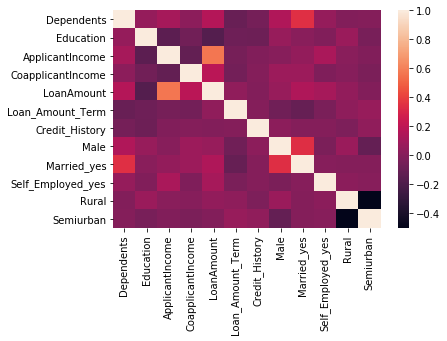

In [0]:
sns.heatmap(X_new_train.corr())

In [0]:
X_new_train.corr()

,Dependents,Education,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Male,Married_yes,Self_Employed_yes,Rural,Semiurban
Dependents,1.000000,0.059161,0.118679,0.027259,0.163997,-0.100484,-0.050082,0.151526,0.343417,0.057888,-0.007359,0.002758
Education,0.059161,1.000000,-0.140760,-0.062290,-0.171133,-0.078784,-0.081822,0.061497,0.017671,-0.010383,0.077520,-0.039410
ApplicantIncome,0.118679,-0.140760,1.000000,-0.116605,0.570909,-0.045306,-0.014715,0.013933,0.050194,0.127180,0.015829,-0.014246
CoapplicantIncome,0.027259,-0.062290,-0.116605,1.000000,0.188619,-0.059878,-0.002056,0.082316,0.080496,-0.016100,0.005329,-0.027044
LoanAmount,0.163997,-0.171133,0.570909,0.188619,1.000000,0.039447,-0.008433,0.065501,0.148367,0.117421,0.043942,-0.008401
Loan_Amount_Term,-0.100484,-0.078784,-0.045306,-0.059878,0.039447,1.000000,0.001470,-0.071026,-0.104608,-0.034361,0.034827,0.061957
Credit_History,-0.050082,-0.081822,-0.014715,-0.002056,-0.008433,0.001470,1.000000,0.026349,0.001259,-0.002362,-0.020983,0.042414
Male,0.151526,0.061497,0.013933,0.082316,0.065501,-0.071026,0.026349,1.000000,0.339026,-0.027421,0.075128,-0.113069
Married_yes,0.343417,0.017671,0.050194,0.080496,0.148367,-0.104608,0.001259,0.339026,1.000000,0.008491,-0.000220,-0.000229
Self_Employed_yes,0.057888,-0.010383,0.127180,-0.016100,0.117421,-0.034361,-0.002362,-0.027421,0.008491,1.000000,0.022065,0.008710


In [0]:
X_new_train.isnull().sum()

Dependents           15
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Male                  0
Married_yes           0
Self_Employed_yes     0
Rural                 0
Semiurban             0
dtype: int64

In [0]:
imputer=SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X_new_train)
X_train_imputed=imputer.transform(X_new_train.values)

In [0]:
imputer.fit(X_new_test)
X_test_imputed=imputer.transform(X_new_test.values)

In [0]:
X_train_imputed

array([[0.000e+00, 0.000e+00, 5.849e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.000e+00, 0.000e+00, 4.583e+03, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 3.000e+03, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.000e+00, 0.000e+00, 8.072e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.000e+00, 0.000e+00, 7.583e+03, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 4.583e+03, ..., 1.000e+00, 0.000e+00,
        1.000e+00]])

In [0]:
X_new_train.isnull().sum()

Dependents           15
Education             0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Male                  0
Married_yes           0
Self_Employed_yes     0
Rural                 0
Semiurban             0
dtype: int64

In [0]:
y_train

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [0]:
Logistic_model=LogisticRegression()
Logistic_model.fit(X_train_imputed,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_predict=Logistic_model.predict(X_test_imputed)

In [0]:
type(y_predict)

numpy.ndarray

In [0]:
y_predict=np.where(y_predict=='1', 'Y', y_predict)
y_predict=np.where(y_predict==0, 'N', y_predict)

In [0]:
y_predict

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y

In [0]:
y_predict=np.where(y_predict=='1', 'Y', y_predict)

In [0]:
import xlwt 
from xlwt import Workbook 
  
# Workbook is created 
wb = Workbook() 
  
# add_sheet is used to create sheet. 
sheet1 = wb.add_sheet('Sheet 1') 
  
for i in range(0,367):
    #sheet1.write(1, i, y_predict[i]) 
    print(i,y_predict[i])



0 Y
1 Y
2 Y
3 Y
4 Y
5 Y
6 Y
7 N
8 Y
9 Y
10 Y
11 Y
12 Y
13 N
14 Y
15 Y
16 Y
17 Y
18 Y
19 Y
20 Y
21 Y
22 Y
23 Y
24 Y
25 N
26 Y
27 Y
28 Y
29 Y
30 Y
31 Y
32 Y
33 Y
34 Y
35 N
36 Y
37 Y
38 Y
39 Y
40 Y
41 Y
42 Y
43 Y
44 Y
45 Y
46 Y
47 Y
48 Y
49 Y
50 Y
51 Y
52 Y
53 Y
54 Y
55 N
56 Y
57 Y
58 N
59 Y
60 Y
61 Y
62 Y
63 N
64 Y
65 Y
66 N
67 N
68 Y
69 N
70 Y
71 Y
72 Y
73 Y
74 Y
75 Y
76 Y
77 Y
78 Y
79 Y
80 N
81 Y
82 N
83 Y
84 Y
85 Y
86 Y
87 Y
88 Y
89 Y
90 Y
91 Y
92 Y
93 Y
94 N
95 Y
96 Y
97 Y
98 Y
99 Y
100 Y
101 N
102 Y
103 Y
104 Y
105 Y
106 N
107 Y
108 Y
109 Y
110 Y
111 Y
112 Y
113 Y
114 Y
115 Y
116 Y
117 N
118 N
119 N
120 Y
121 Y
122 Y
123 N
124 N
125 Y
126 N
127 Y
128 Y
129 Y
130 Y
131 Y
132 Y
133 Y
134 Y
135 Y
136 Y
137 Y
138 Y
139 Y
140 N
141 Y
142 N
143 Y
144 Y
145 Y
146 Y
147 N
148 Y
149 Y
150 Y
151 Y
152 Y
153 N
154 Y
155 Y
156 Y
157 Y
158 Y
159 Y
160 Y
161 N
162 Y
163 Y
164 Y
165 N
166 N
167 Y
168 N
169 Y
170 Y
171 Y
172 Y
173 N
174 N
175 Y
176 Y
177 N
178 Y
179 Y
180 Y
181 Y
182 Y
183 Y
184 Y


In [0]:
y_predict[1]

'Y'

In [0]:
len(y_predict)

367

In [0]:
from openpyxl import *

In [0]:
submission_path="C:\\Users\\sagar\\Downloads\\Hackathon\\Loan_prediction\\sample_submission.csv"

wb=load_workbook(submission_path)
ws=wb['sample_submission']
for i in range(1,368):
    wcell=ws.cell(1,i)
    wcell.value=y_predict[i]

wb.save(submission_path)

InvalidFileException: openpyxl does not support .csv file format, please check you can open it with Excel first. Supported formats are: .xlsx,.xlsm,.xltx,.xltm